In [1]:
import os
import pandas as pd

image_path = 'images'
train_path = os.path.join(image_path, 'train')
test_path = os.path.join(image_path, 'test')


In [3]:
os.getcwd()

'c:\\Users\\master\\Downloads\\GeometricShapeMathematics'

In [5]:
# color to gray
from PIL import Image

def convert_color_to_gray(image_path, output_path):
    # Load image
    img = Image.open(image_path)
    # Convert to gray
    grayscale_img = img.convert('L')
    # Save
    grayscale_img.save(output_path)
    print(f'Save {output_path}.')
classes = os.listdir(train_path)

metadata = []
for target in classes:
    current_folder = os.path.join(train_path, target)
    file_list = os.listdir(current_folder)
    for file in file_list:
        input_path = os.path.join(current_folder, file)
        output_path = os.path.join(train_path, file)
        convert_color_to_gray(input_path, output_path)
        metadata.append([file, target])
        

Save images\train\circle-0.jpg.
Save images\train\circle-1.jpg.
Save images\train\circle-10.jpg.
Save images\train\circle-100.jpg.
Save images\train\circle-1000.jpg.
Save images\train\circle-1001.jpg.
Save images\train\circle-1002.jpg.
Save images\train\circle-1003.jpg.
Save images\train\circle-1004.jpg.
Save images\train\circle-1005.jpg.
Save images\train\circle-1006.jpg.
Save images\train\circle-1007.jpg.
Save images\train\circle-1008.jpg.
Save images\train\circle-1009.jpg.
Save images\train\circle-101.jpg.
Save images\train\circle-1010.jpg.
Save images\train\circle-1011.jpg.
Save images\train\circle-1012.jpg.
Save images\train\circle-1013.jpg.
Save images\train\circle-1014.jpg.
Save images\train\circle-1015.jpg.
Save images\train\circle-1016.jpg.
Save images\train\circle-1017.jpg.
Save images\train\circle-1018.jpg.
Save images\train\circle-1019.jpg.
Save images\train\circle-102.jpg.
Save images\train\circle-1020.jpg.
Save images\train\circle-1021.jpg.
Save images\train\circle-1022.j

In [9]:
metadata = pd.DataFrame(metadata)

In [10]:
metadata

,0,1
0,circle-0.jpg,circle
1,circle-1.jpg,circle
2,circle-10.jpg,circle
3,circle-100.jpg,circle
4,circle-1000.jpg,circle
...,...,...
11995,triangle-995.jpg,triangle
11996,triangle-996.jpg,triangle
11997,triangle-997.jpg,triangle
11998,triangle-998.jpg,triangle


In [13]:
metadata.columns

RangeIndex(start=0, stop=2, step=1)

In [14]:
 metadata.rename(columns = {0 : 'file_name', 1: 'shape'}, inplace = True)


In [16]:
metadata.to_csv('metadata/metadata.csv')

In [17]:
test_meta = []
for target in classes:
    current_folder = os.path.join(test_path, target)
    file_list = os.listdir(current_folder)
    for file in file_list:
        input_path = os.path.join(current_folder, file)
        output_path = os.path.join(test_path, file)
        convert_color_to_gray(input_path, output_path)
        test_meta.append([file, target])

test_meta = pd.DataFrame(test_meta)
test_meta.rename(columns = {0: 'file_name', 1: 'shape'}, inplace = True)
test_meta.to_csv('test_meta.csv')

Save images\test\circle-2000.jpg.
Save images\test\circle-2001.jpg.
Save images\test\circle-2002.jpg.
Save images\test\circle-2003.jpg.
Save images\test\circle-2004.jpg.
Save images\test\circle-2005.jpg.
Save images\test\circle-2006.jpg.
Save images\test\circle-2007.jpg.
Save images\test\circle-2008.jpg.
Save images\test\circle-2009.jpg.
Save images\test\circle-2010.jpg.
Save images\test\circle-2011.jpg.
Save images\test\circle-2012.jpg.
Save images\test\circle-2013.jpg.
Save images\test\circle-2014.jpg.
Save images\test\circle-2015.jpg.
Save images\test\circle-2016.jpg.
Save images\test\circle-2017.jpg.
Save images\test\circle-2018.jpg.
Save images\test\circle-2019.jpg.
Save images\test\circle-2020.jpg.
Save images\test\circle-2021.jpg.
Save images\test\circle-2022.jpg.
Save images\test\circle-2023.jpg.
Save images\test\circle-2024.jpg.
Save images\test\circle-2025.jpg.
Save images\test\circle-2026.jpg.
Save images\test\circle-2027.jpg.
Save images\test\circle-2028.jpg.
Save images\te

In [19]:
# Topological trnasform

import gudhi as gd

import numpy as np

# Load .jpg file as numpy array
img_path = os.path.join(train_path, 'circle-0.jpg')
image = Image.open(img_path)

image_array = np.array(image)
image_array.shape

(224, 224)

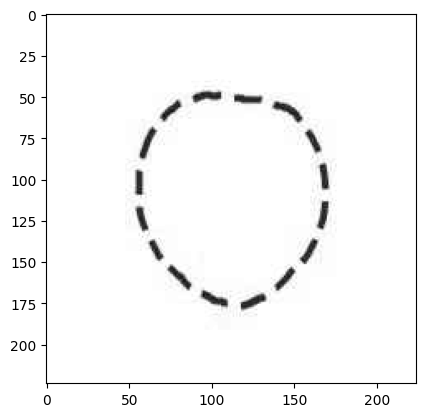

In [20]:
import matplotlib.pyplot as plt

plt.imshow(image_array, cmap='gray')

In [79]:
from gudhi.sklearn.cubical_persistence import CubicalPersistence
from sklearn.pipeline import Pipeline
from gudhi.representations import BettiCurve, DiagramSelector, DimensionSelector
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class InfToPointTransformer(BaseEstimator, TransformerMixin):
    """
    Transformer for replacing np.inf values in persistence diagrams with a specified value.
    """

    def __init__(self, new_value=1.0):
        """
        Initialize the transformer.

        Parameters:
            new_value (float): The value to replace np.inf with.
        """
        self.new_value = new_value

    def fit(self, X, y=None):
        """
        Fit method for the transformer. This transformer does not need fitting, so it just returns itself.

        Parameters:
            X (list of n x 2 numpy arrays): Input persistence diagrams.
            y (optional): Unused.

        Returns:
            self
        """
        return self

    def transform(self, X):
        """
        Transform method for the transformer.

        Parameters:
            X (list of n x 2 numpy arrays): Input persistence diagrams.

        Returns:
            list of n x 2 numpy arrays: Transformed persistence diagrams.
        """
        transformed_X = []
        for diag in X:
            modified_diag = diag.copy()
            modified_diag[np.isinf(modified_diag)] = self.new_value
            transformed_X.append(modified_diag)
        return transformed_X

cp0 = CubicalPersistence(
    homology_dimensions=0,
    input_type='top_dimensional_cells',
    homology_coeff_field=2,
    n_jobs=-1 
)
cp1 = CubicalPersistence(
    homology_dimensions=0,
    input_type='top_dimensional_cells',
    homology_coeff_field=2,
    n_jobs=-1 
)
cp = CubicalPersistence(homology_dimensions=[0, 1],
                        input_type='top_dimensional_cells',
                        homology_coeff_field=2,
                        n_jobs=-1)

top_train_path = 'topology/train'
betti0_path = os.path.join(top_train_path, 'betti0')
betti1_path = os.path.join(top_train_path, 'betti1')
euler_path = os.path.join(top_train_path, 'euler')

for file in os.listdir(train_path):
    img_path = os.path.join(train_path, file)
    print(img_path)
    image = Image.open(img_path)
    image_array = np.array(image)
    image_array = 1-image_array/255.0
    image_array = np.expand_dims(image_array, axis=0)

    diags = cp.fit_transform(image_array)
    diag0 = [diags[0][0]]
    diag1 = [diags[0][1]]
    diag0_= InfToPointTransformer().fit_transform(diag0)
    diag1_= InfToPointTransformer().fit_transform(diag1)
    betti0= BettiCurve(resolution=256).fit_transform(diag0_)
    betti1= BettiCurve(resolution=256).fit_transform(diag1_)
    euler = betti0 - betti1
    np.save(os.path.join(betti0_path, file), betti0)
    np.save(os.path.join(betti1_path, file), betti1)
    np.save(os.path.join(euler_path, file), euler)


images\train\circle-0.jpg
images\train\circle-1.jpg
images\train\circle-10.jpg
images\train\circle-100.jpg
images\train\circle-1000.jpg
images\train\circle-1001.jpg
images\train\circle-1002.jpg
images\train\circle-1003.jpg
images\train\circle-1004.jpg
images\train\circle-1005.jpg
images\train\circle-1006.jpg
images\train\circle-1007.jpg
images\train\circle-1008.jpg
images\train\circle-1009.jpg
images\train\circle-101.jpg
images\train\circle-1010.jpg
images\train\circle-1011.jpg
images\train\circle-1012.jpg
images\train\circle-1013.jpg
images\train\circle-1014.jpg
images\train\circle-1015.jpg
images\train\circle-1016.jpg
images\train\circle-1017.jpg
images\train\circle-1018.jpg
images\train\circle-1019.jpg
images\train\circle-102.jpg
images\train\circle-1020.jpg
images\train\circle-1021.jpg
images\train\circle-1022.jpg
images\train\circle-1023.jpg
images\train\circle-1024.jpg
images\train\circle-1025.jpg
images\train\circle-1026.jpg
images\train\circle-1027.jpg
images\train\circle-1028.

In [31]:
os.listdir(train_path)[0]

'circle-0.jpg'

In [25]:
os.listdir(top_train_path)

['betti0', 'betti1', 'euler']

In [70]:
img_path = os.path.join(train_path, 'circle-0.jpg')
print(img_path)
image = Image.open(img_path)
image_array = np.array(image)
image_array = 1-image_array/255.0
image_array = np.expand_dims(image_array, axis=0)

diags = cp.fit_transform(image_array)
diag0 = [diags[0][0]]
diag1 = [diags[0][1]]
diag0_= InfToPointTransformer().fit_transform(diag0)
diag1_= InfToPointTransformer().fit_transform(diag1)
betti0= BettiCurve(resolution=256).fit_transform(diag0_)
betti1= BettiCurve(resolution=256).fit_transform(diag1_)
euler = betti0 - betti1


images\train\circle-0.jpg


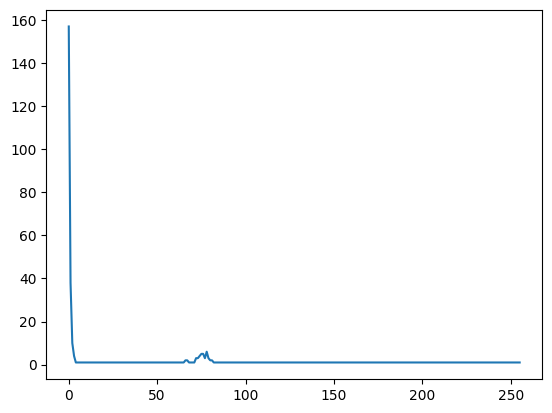

In [72]:
import matplotlib.pyplot as plt

plt.plot(betti0[0])

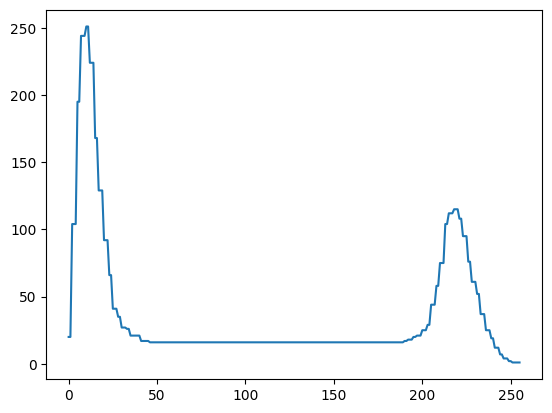

In [73]:
plt.plot(betti1[0])

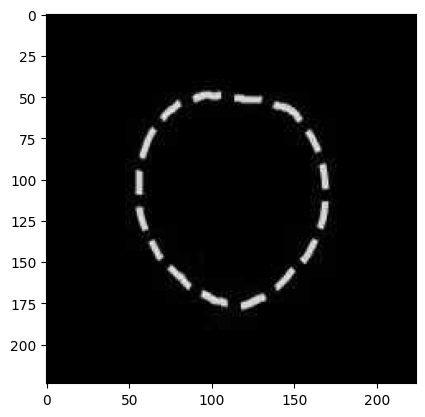

In [75]:
plt.imshow(image_array[0], cmap='gray')

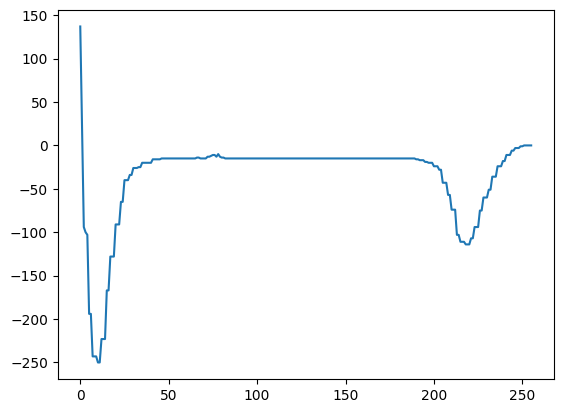

In [77]:
plt.plot(euler[0])

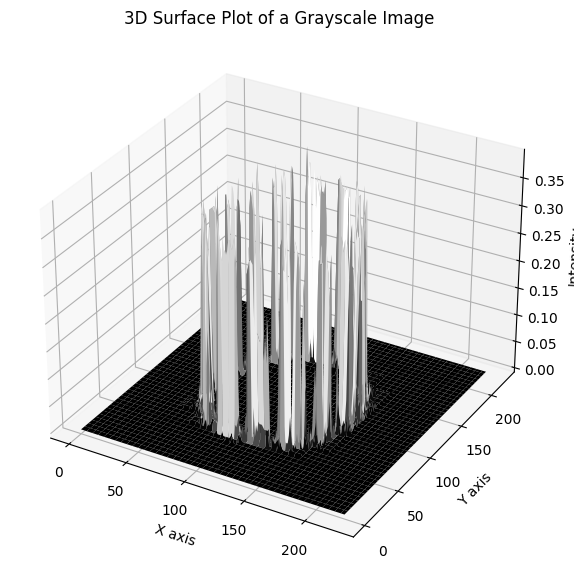

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def surface_plot(image):
    # Plotting the image as a 3D surface
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Create a meshgrid to plot the surface
    x = np.arange(image.shape[1])
    y = np.arange(image.shape[0])
    x, y = np.meshgrid(x, y)

    # Plot the surface
    ax.plot_surface(x, y, image, cmap='gray')

    # Set labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Intensity')
    ax.set_title('3D Surface Plot of a Grayscale Image')

    # Show the plot
    plt.show()

surface_plot(image_array[0])

In [80]:
top_test_path = 'topology/test'
betti0_path = os.path.join(top_test_path, 'betti0')
betti1_path = os.path.join(top_test_path, 'betti1')
euler_path = os.path.join(top_test_path, 'euler')

for file in os.listdir(test_path):
    img_path = os.path.join(test_path, file)
    print(img_path)
    image = Image.open(img_path)
    image_array = np.array(image)
    image_array = 1-image_array/255.0
    image_array = np.expand_dims(image_array, axis=0)

    diags = cp.fit_transform(image_array)
    diag0 = [diags[0][0]]
    diag1 = [diags[0][1]]
    diag0_= InfToPointTransformer().fit_transform(diag0)
    diag1_= InfToPointTransformer().fit_transform(diag1)
    betti0= BettiCurve(resolution=256).fit_transform(diag0_)
    betti1= BettiCurve(resolution=256).fit_transform(diag1_)
    euler = betti0 - betti1
    np.save(os.path.join(betti0_path, file), betti0)
    np.save(os.path.join(betti1_path, file), betti1)
    np.save(os.path.join(euler_path, file), euler)


images\test\circle-2000.jpg
images\test\circle-2001.jpg
images\test\circle-2002.jpg
images\test\circle-2003.jpg
images\test\circle-2004.jpg
images\test\circle-2005.jpg
images\test\circle-2006.jpg
images\test\circle-2007.jpg
images\test\circle-2008.jpg
images\test\circle-2009.jpg
images\test\circle-2010.jpg
images\test\circle-2011.jpg
images\test\circle-2012.jpg
images\test\circle-2013.jpg
images\test\circle-2014.jpg
images\test\circle-2015.jpg
images\test\circle-2016.jpg
images\test\circle-2017.jpg
images\test\circle-2018.jpg
images\test\circle-2019.jpg
images\test\circle-2020.jpg
images\test\circle-2021.jpg
images\test\circle-2022.jpg
images\test\circle-2023.jpg
images\test\circle-2024.jpg
images\test\circle-2025.jpg
images\test\circle-2026.jpg
images\test\circle-2027.jpg
images\test\circle-2028.jpg
images\test\circle-2029.jpg
images\test\circle-2030.jpg
images\test\circle-2031.jpg
images\test\circle-2032.jpg
images\test\circle-2033.jpg
images\test\circle-2034.jpg
images\test\circle-2